# Hipótesis Mercedes aprovecha su dominio en la era hibrída para mejorar sus coches eléctricos de calle
#### Esta hipótesis la trabajo con la información obtenida sobre los coches eléctricos que se están comercializando

> Importación librerías

In [17]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',300)
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


> Lectura de datos

In [5]:
electricos = pd.read_csv('Data/ElectricCarData_Clean.csv')
electricos.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
electricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


> Filtrando para posterior visualización

In [7]:
df = electricos.groupby('Brand')['Efficiency_WhKm','Range_Km'].mean().round()
eficiencia = df.sort_values(['Efficiency_WhKm','Range_Km'],ascending=False)
eficiencia.head()


,Efficiency_WhKm,Range_Km
Brand,,
Byton,235.0,372.0
Jaguar,232.0,365.0
Audi,225.0,357.0
Mercedes,220.0,350.0
Porsche,209.0,388.0


In [18]:
trace1 = {
  'x': eficiencia.index,
  'y': eficiencia['Efficiency_WhKm'],
  'name': 'Eficiencia WH por KM',
  'type': 'bar',
  

};

trace2 = {
  'x': eficiencia.index,
  'y': eficiencia['Range_Km'],
  'name': 'Autonomía',
  'type': 'bar'
  
};

data = [trace1,trace2];
layout = {
  'xaxis': {'title': 'Marcas'},
  'title': 'Eficiencia WH por KM y autonomía vehículos eléctricos'
};
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(
        tickangle = 90)
iplot(fig)

# Porcentaje equipos que más han ganado mundiales

> Importando datos

In [16]:
constructores = pd.read_csv('Data/F1_Constructor_Standings.csv')
constructores.tail()

,Pos,Team,PTS,Year
660,6,AlphaTauri Honda,142.0,2021 Constructor Standings
661,7,Aston Martin Mercedes,77.0,2021 Constructor Standings
662,8,Williams Mercedes,23.0,2021 Constructor Standings
663,9,Alfa Romeo Racing Ferrari,13.0,2021 Constructor Standings
664,10,Haas Ferrari,0.0,2021 Constructor Standings


> Limpiando columna Year para obtener sólo el año

In [10]:
for i in constructores['Year']:
    constructores['Year'] = constructores['Year'].replace('Constructor Standings','',regex=True)



In [11]:
constructores

,Pos,Team,PTS,Year
0,1,Vanwall,48.0,1958
1,2,Ferrari,40.0,1958
2,3,Cooper Climax,31.0,1958
3,4,BRM,18.0,1958
4,5,Maserati,6.0,1958
...,...,...,...,...
660,6,AlphaTauri Honda,142.0,2021
661,7,Aston Martin Mercedes,77.0,2021
662,8,Williams Mercedes,23.0,2021
663,9,Alfa Romeo Racing Ferrari,13.0,2021


In [15]:
campeonatos_constructores = pd.read_excel('Data/Campeonatos_Constructores.xlsx')
campeonatos_constructores.head()

,Constructor,Año
0,Ferrari,1961
1,Ferrari,1964
2,Ferrari,1975
3,Ferrari,1976
4,Ferrari,1977


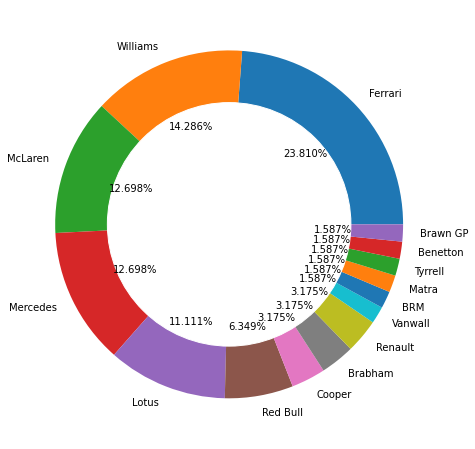

In [13]:
data = campeonatos_constructores["Constructor"].value_counts()
 
my_circle=plt.Circle( (0,0), 
                     0.7, 
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index, 
        autopct='%1.3f%%') 

p=plt.gcf()
p.gca().add_artist(my_circle);
plt.savefig("Campeonatos_Constructores.png")

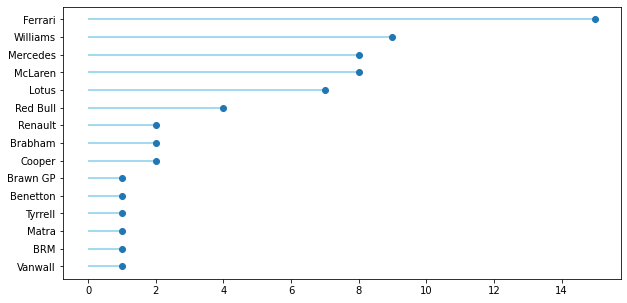

In [14]:
conteo = campeonatos_constructores["Constructor"].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=0, 
           xmax=conteo, 
           color='skyblue')
plt.plot(conteo, conteo.index, "o");